In [2]:
import numpy as np
from astropy.modeling import models,fitting
import matplotlib.pyplot as plt
import astropy.table
import os.path

In [3]:
datadir = "../tests/data/"

In [59]:
def fitter_function(x, y):
    ''' This is our fitter function using which we can plot FWHM (y var) versus focus step (x var). 
    Our inputs are the columns with focus step and FWHM, assuming these are in columns zero (x) and 
    one (y) of our arrays'''
    
    def find_proper_fit(x, y):
        '''This finds the coefficients of the fit parabola.
        Step 1: looking for parabola
        Step 2: get linear least square fitting
        Step 3: execute
        Step 4: store coefficients in an array'''
        
        t_init = models.Polynomial1D(2)
        fitter = fitting.LinearLSQFitter()
        t_fit = fitter(t_init, x, y)
        a = t_fit.c2.value
        b = t_fit.c1.value
        c = t_fit.c0.value
        coefficients = np.array([a, b, c])
        
        return coefficients
    
    '''Once we have the fit, the vertex is required. Using the formula of a parabola vertex we can get
    the optimal focus length.'''
    
    def find_vertex(coefficients):
    
        vertex = -b/(2*a)
        
        return vertex
    
    return vertex

In [17]:
data50 = astropy.table.Table.read(os.path.join(datadir,"steppernoise.csv"))
data7 = astropy.table.Table.read(os.path.join(datadir,"stepperseven.csv"))

In [55]:
t_init = models.Polynomial1D(2)
fitter = fitting.LinearLSQFitter()
t_fit50 = fitter(t_init,data50['x'],data50['y'])
t_true = models.Polynomial1D(2)
t_true.parameters = [75,4400,6]
t_true
t_true.parameters[1]
t_fit50

<Polynomial1D(2, c0=17751264.090767, c1=4714.0166923, c2=4.25856098)>

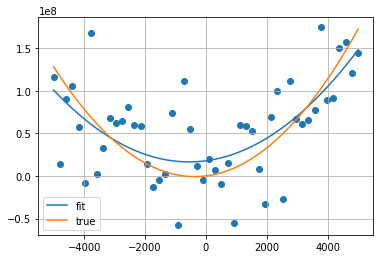

In [56]:
plt.scatter(data50['x'],data50['y'])
plt.plot(data50['x'],t_fit50(data50['x']), label = 'fit')
plt.plot(data50['x'],t_true(data50['x']), label = 'true')
plt.grid()
plt.legend();

In [22]:
t_fit50

<Polynomial1D(2, c0=17751264.090767, c1=4714.0166923, c2=4.25856098)>

In [23]:
-t_fit50.parameters[1]/(2*t_fit50.parameters[2])

-553.4753065616416

## Try again with less noisy data!

In [12]:
data50new = astropy.table.Table.read(os.path.join(datadir,"newsteppernoise.csv"))
data7new = astropy.table.Table.read(os.path.join(datadir,"newstepperseven.csv"))

FileNotFoundError: [Errno 2] No such file or directory: '../tests/data/newsteppernoise.csv'